In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel('train.xlsx')
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
data.shape

(5961, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

### Rating

In [6]:
data['Rating']=data['Rating'].str.rstrip('%')
data['Rating']= data['Rating'].astype(float)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       5961 non-null   object 
 1   Experience          5961 non-null   object 
 2   Rating              2659 non-null   float64
 3   Place               5936 non-null   object 
 4   Profile             5961 non-null   object 
 5   Miscellaneous_Info  3341 non-null   object 
 6   Fees                5961 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 326.1+ KB


In [8]:
data['Rating'].fillna(data['Rating'].mean(),inplace=True)

In [9]:
data['Rating']= data['Rating'].astype(int)

In [10]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,94,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,94,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [11]:
data.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

### Profile

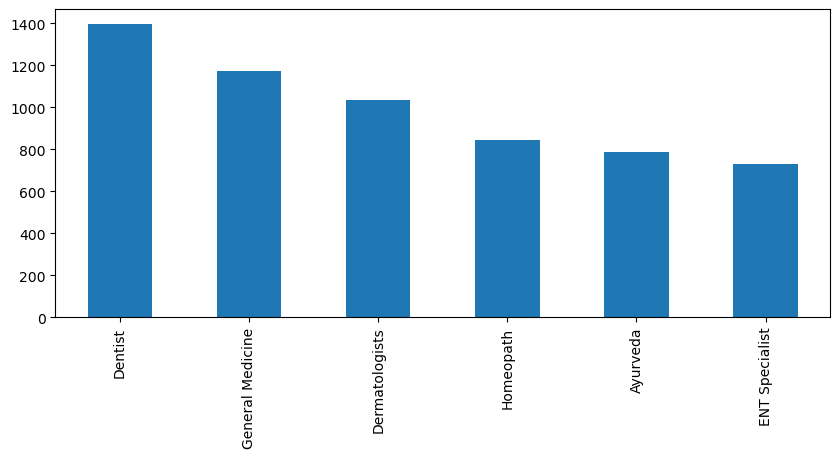

In [12]:
value_counts = data['Profile'].value_counts()
# Plotting a bar graph of value counts
value_counts.plot(kind='bar', figsize=(10, 4))
plt.show()

In [13]:
data=pd.get_dummies(data,columns=['Profile'],drop_first=True)

In [14]:
data.shape

(5961, 11)

In [15]:
data.head()

,Qualification,Experience,Rating,Place,Miscellaneous_Info,Fees,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam","100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,0,1
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore","98% 76 Feedback Whitefield, Bangalore",350,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,94,"Mathikere - BEL, Bangalore",NaN,300,0,0,1,0,0
3,"BSc - Zoology, BAMS",12 years experience,94,"Bannerghatta Road, Bangalore","Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,0,0,0
4,BAMS,20 years experience,100,"Keelkattalai, Chennai","100% 4 Feedback Keelkattalai, Chennai",250,0,0,0,0,0


In [16]:
data.isnull().sum()

Qualification                  0
Experience                     0
Rating                         0
Place                         25
Miscellaneous_Info          2620
Fees                           0
Profile_Dentist                0
Profile_Dermatologists         0
Profile_ENT Specialist         0
Profile_General Medicine       0
Profile_Homeopath              0
dtype: int64

In [17]:
# drop miscellaneous_info
data.drop(columns=['Miscellaneous_Info'],inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Qualification             5961 non-null   object
 1   Experience                5961 non-null   object
 2   Rating                    5961 non-null   int32 
 3   Place                     5936 non-null   object
 4   Fees                      5961 non-null   int64 
 5   Profile_Dentist           5961 non-null   uint8 
 6   Profile_Dermatologists    5961 non-null   uint8 
 7   Profile_ENT Specialist    5961 non-null   uint8 
 8   Profile_General Medicine  5961 non-null   uint8 
 9   Profile_Homeopath         5961 non-null   uint8 
dtypes: int32(1), int64(1), object(3), uint8(5)
memory usage: 238.8+ KB


In [19]:
data.head()

,Qualification,Experience,Rating,Place,Fees,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",100,0,0,0,0,1
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",350,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,94,"Mathikere - BEL, Bangalore",300,0,0,1,0,0
3,"BSc - Zoology, BAMS",12 years experience,94,"Bannerghatta Road, Bangalore",250,0,0,0,0,0
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",250,0,0,0,0,0


### Experience

In [34]:
data['Experience']=data['Experience'].str.split().str[0]
data['Experience']=data['Experience'].astype(int)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Qualification             5961 non-null   object
 1   Experience                5961 non-null   int32 
 2   Rating                    5961 non-null   int32 
 3   Place                     5936 non-null   object
 4   Fees                      5961 non-null   int64 
 5   Profile_Dentist           5961 non-null   uint8 
 6   Profile_Dermatologists    5961 non-null   uint8 
 7   Profile_ENT Specialist    5961 non-null   uint8 
 8   Profile_General Medicine  5961 non-null   uint8 
 9   Profile_Homeopath         5961 non-null   uint8 
dtypes: int32(2), int64(1), object(2), uint8(5)
memory usage: 215.5+ KB


In [36]:
data.head()

,Qualification,Experience,Rating,Place,Fees,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",100,0,0,0,0,1
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",350,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,94,"Mathikere - BEL, Bangalore",300,0,0,1,0,0
3,"BSc - Zoology, BAMS",12,94,"Bannerghatta Road, Bangalore",250,0,0,0,0,0
4,BAMS,20,100,"Keelkattalai, Chennai",250,0,0,0,0,0


### Place